In [1]:
import os
import numpy as np
import pandas as pd
from dotenv import load_dotenv
load_dotenv()
import plotly_express as px
import os
from typing import Union
from datetime import datetime, timedelta
import pandas as pd


from dotenv import load_dotenv
import matplotlib.pyplot as plt


def get_data_by_dates(start_date: Union[datetime, str], end_date=None, days=None):
    """
    Returns a single dataframe with all the data from the start date to the end date / for duration in days.
    """
    data_path = os.getenv("DATA_PATH")

    start_date = (
        datetime.strptime(start_date, "%Y_%m_%d")
        if isinstance(start_date, str)
        else start_date
    )
    if end_date is None:
        if days is None:
            try:
                return pd.read_csv(
                    os.path.join(data_path, start_date.strftime("%Y_%m_%d"), "data.csv")
                )
            except Exception as e:
                raise Exception(f"Error reading file: {e}")
        end_date = start_date + timedelta(days=days)
    else:
        end_date = (
            datetime.strptime(end_date, "%Y_%m_%d")
            if isinstance(end_date, str)
            else end_date
        )

    assert start_date < end_date, "start_date must be before end_date"

    # get all files that match the dates
    files = []
    for folder in os.listdir(data_path):
        if os.path.isdir(os.path.join(data_path, folder)):
            folder_date = datetime.strptime(folder, "%Y_%m_%d")
            if start_date <= folder_date <= end_date:
                files.append(os.path.join(data_path, folder, "data.csv"))

    # compare lenght of files with the number of days
    if len(files) != (end_date - start_date).days + 1:
        print(
            f"Number of files({len(files)}) does not match the number of days given({(end_date - start_date).days + 1})"
        )
    try:
        df = pd.read_csv(files[0])
        for file in files[1:]:
            df = pd.concat([df, pd.read_csv(file)])
        df.sort_values(by="timestamp", inplace=True)
        return df
    except Exception as e:
        raise Exception(f"Error reading files: {e}")
        return None

In [80]:
df = pd.read_csv("/Users/juusoahlroos/Documents/own/gradu/parsed_data/results/tune_multiple_val_envs.csv")
reward_col = ["trial_reward"]
interesting_cols = ['max_inventory','sharpe'] 
parameter_cols = ['n_steps', 'batch_size', 'gae_lambda', 'gamma', 'learning_rate', 'max_grad_norm', 'vf_coef', 'ent_coef', 'clip_range', 'clip_range_vf', 'n_epochs', 'normalize_advantage', 'sde_sample_freq']


grouped = df.groupby('trial_group_id')
reward = grouped[reward_col].agg(['mean', 'var'])
reward.columns = ['_'.join(col) if isinstance(col, tuple) else col for col in reward.columns]
# # Calculate mean for parameter columns
parameter_stats = grouped[parameter_cols].mean()
max_test = grouped[parameter_cols].max()
min_test = grouped[parameter_cols].min()

interesting_stats = grouped[interesting_cols].mean()



max_test.values

parameter_stats



# # # Combine the two resulting DataFrames (interesting_stats and parameter_stats)
result = pd.concat([reward,interesting_stats, parameter_stats], axis=1)
# # # Reset the index
result.reset_index(inplace=True)
result['combined_group_score'] = result['trial_reward_mean'] / result['trial_reward_var']
result.sort_values('combined_group_score', ascending=False)[['combined_group_score'] + list(reward.columns)+interesting_cols + list(parameter_cols)].head(10)
result.sort_values('combined_group_score', ascending=False).iloc[1][parameter_cols].to_dict()

{'n_steps': 16.0,
 'batch_size': 4096.0,
 'gae_lambda': 0.92,
 'gamma': 0.995,
 'learning_rate': 5.791490307962484e-05,
 'max_grad_norm': 0.9,
 'vf_coef': 0.0873730954927472,
 'ent_coef': 0.4,
 'clip_range': 0.1,
 'clip_range_vf': 0.1,
 'n_epochs': 10.0,
 'normalize_advantage': 0.0,
 'sde_sample_freq': 8.0}

In [71]:
df = pd.read_csv("/Users/juusoahlroos/Documents/own/gradu/parsed_data/results/tune_multiple_val_envs_csv.csv")

reward_col = ["trial_reward"]
interesting_cols = ['max_inventory','sharpe'] 
parameter_cols = ['n_steps', 'batch_size', 'gae_lambda', 'gamma', 'learning_rate', 'max_grad_norm', 'vf_coef', 'ent_coef', 'clip_range', 'clip_range_vf', 'n_epochs', 'normalize_advantage', 'sde_sample_freq']


df['trial_reward'].sort_values()

495    0.000000
199    0.000000
498    0.000000
204    0.000000
497    0.000000
         ...   
301    2.563640
816    2.682756
161    2.715703
837    2.795789
911    5.003991
Name: trial_reward, Length: 920, dtype: float64

In [92]:
df = pd.read_csv("/Users/juusoahlroos/Documents/own/gradu/parsed_data/results/zero_inv_run.csv")
df.value.diff()

df = get_data_by_dates("2022_01_11")
df

,timestamp,best_bid,best_ask,mid_price,low_price,high_price,intensity,volatility,osi
0,1641859200044,1.1224,1.1148,1.11860,1.1224,1.1225,6878.850515,0.001900,27.23
1,1641859201228,1.1225,1.1148,1.11865,1.1224,1.1225,6878.850515,0.001900,27.23
2,1641859202379,1.1225,1.1148,1.11865,0.0000,0.0000,6878.850515,0.001900,27.23
3,1641859203387,1.1226,1.1148,1.11870,1.1223,1.1227,6878.850515,0.001900,27.23
4,1641859204510,1.1226,1.1148,1.11870,1.1226,1.1229,6878.850515,0.001900,27.23
...,...,...,...,...,...,...,...,...,...
82507,1641945595134,1.1861,1.1166,1.15135,1.1862,1.1862,1.666894,0.000697,0.00
82508,1641945596163,1.1865,1.1166,1.15155,1.1862,1.1866,1.666894,0.000697,0.00
82509,1641945597188,1.1865,1.1166,1.15155,1.1866,1.1866,1.666894,0.000697,0.00
82510,1641945598263,1.1865,1.1166,1.15155,1.1865,1.1866,1.666894,0.000697,0.00


In [18]:

start_date = datetime.strptime("2022_01_25", "%Y_%m_%d")
for i in range(100):
    df = get_data_by_dates(start_date)
    ts = df.timestamp.iloc[0] / 1000
    last_ts = df.timestamp.iloc[-1] / 1000
    ts_to_dt = datetime.fromtimestamp(ts) 
    last_ts_to_dt = datetime.fromtimestamp(last_ts)
    to_plot =  df.best_bid - df.best_ask
    print(f"{start_date}: {len(df)}, {ts_to_dt} - {last_ts_to_dt} - {round(to_plot.mean(),6)}")
    # to_plot =  df['high_price']
    # # to_plot =  df.intensity
    # print(f"{start_date}: {round(to_plot.mean(),6)}")
    # # plt.plot(to_plot, label=start_date)
    start_date = start_date + timedelta(days=1)

# show legend
# plt.legend()

# 2022-01-25 00:00:00: 83303
# 2022-01-26 00:00:00: 83362
# 2022-01-27 00:00:00: 83191
# 2022-01-28 00:00:00: 82775
# 2022-01-29 00:00:00: 82226
# 2022-01-30 00:00:00: 82088
# 2022-01-31 00:00:00: 82278
# 2022-02-01 00:00:00: 82314

2022-01-25 00:00:00: 83303, 2022-01-25 02:00:00.262000 - 2022-01-26 01:59:59.506000 - -0.00011
2022-01-26 00:00:00: 83362, 2022-01-26 02:00:00.536000 - 2022-01-27 01:59:59.729000 - -0.000119
2022-01-27 00:00:00: 83191, 2022-01-27 02:00:00.944000 - 2022-01-28 01:59:59.615000 - -0.000113
2022-01-28 00:00:00: 82775, 2022-01-28 02:00:00.619000 - 2022-01-29 01:59:59.032000 - -0.000108
2022-01-29 00:00:00: 82226, 2022-01-29 02:00:00.133000 - 2022-01-30 01:59:59.046000 - -0.000104
2022-01-30 00:00:00: 82088, 2022-01-30 02:00:00.072000 - 2022-01-31 01:59:59.631000 - -0.000103
2022-01-31 00:00:00: 82278, 2022-01-31 02:00:00.784000 - 2022-02-01 01:59:59.401000 - -0.000103
2022-02-01 00:00:00: 82314, 2022-02-01 02:00:00.500000 - 2022-02-02 01:59:59.687000 - -0.000101
2022-02-02 00:00:00: 82452, 2022-02-02 02:00:00.729000 - 2022-02-03 01:59:58.998000 - 0.002535
2022-02-03 00:00:00: 82395, 2022-02-03 02:00:00.011000 - 2022-02-04 01:59:59.539000 - -0.000103


Exception: Error reading file: [Errno 2] No such file or directory: '/Volumes/ssd/gradu_data/parsed/2022_02_04/data.csv'

In [19]:
df = pd.read_csv("/Users/juusoahlroos/Documents/own/gradu/parsed_data/results/rolling_test.csv", header=None)

df.columns = ['timesteps', 'return','sharpe','drawdown','trades','max_inventory','mean_abs_inv', 'date','res_type']
df = df.iloc[34:]

df
# px.bar(df, x='mean_abs_inv', y='return')
px.line(df, x='date', y='max_inventory', color='res_type')

df_expert = df[df['res_type'] == 'expert']
df_model = df[df['res_type'] == 'model']

df_expert['total'] = (1+df_expert['return']).cumprod()
df_model['total'] = (1+df_model['return']).cumprod()

df_tot = pd.merge(df_expert, df_model, on='date', suffixes=('_expert', '_model'))
px.line(df_tot, x='date', y=['total_expert', 'total_model'])



df.groupby('res_type').mean()

/var/folders/7t/0_l8zk3s4w3bj0r9k4v9418w0000gn/T/ipykernel_28795/2825230140.py:13: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/7t/0_l8zk3s4w3bj0r9k4v9418w0000gn/T/ipykernel_28795/2825230140.py:14: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,timesteps,return,sharpe,drawdown,trades,max_inventory,mean_abs_inv,date
res_type,,,,,,,,
expert,74671.909091,0.004778,0.109516,-0.011809,33660.181818,0.294209,0.108055,1838191654745553884475873597611051849711180667...
model,74671.909091,0.002891,0.090105,-0.012154,35897.272727,0.292359,0.097896,1838191654745553884475873597611051849711180667...


In [12]:
pd.read_csv("/Users/juusoahlroos/Documents/own/gradu/src/data_management/clone_data.csv").drop_duplicates()


,0,1,2,3,4
0,0.000000,-0.792759,-0.84798,-0.2,0.2
2,-0.000400,-0.792759,-0.84798,-0.2,0.2
4,0.000400,-0.792759,-0.84798,-0.2,0.2
9,-0.000833,-0.792759,-0.84798,-0.2,0.2
11,-0.001233,-0.792759,-0.84798,-0.2,0.2
...,...,...,...,...,...
1061975,0.334400,-0.744941,-0.79828,-0.5,-0.0
1062002,0.333967,-0.744941,-0.79828,-0.5,-0.0
1062114,0.338933,-0.744941,-0.79828,-0.5,-0.0
1062119,0.340167,-0.744941,-0.79828,-0.5,-0.0


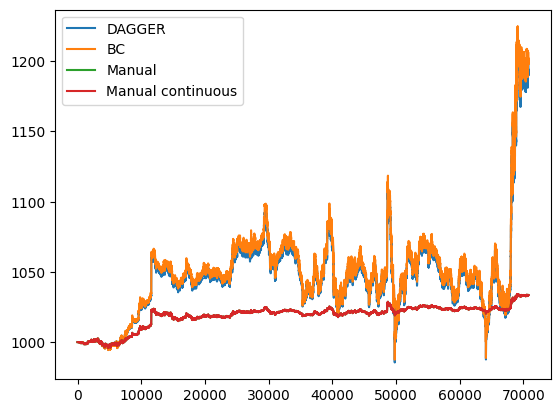

In [45]:
df_dagger = pd.read_csv("/Users/juusoahlroos/Documents/own/gradu/parsed_data/results/compare_clone_dagger.csv")
df_bc = pd.read_csv("/Users/juusoahlroos/Documents/own/gradu/parsed_data/results/compare_clone_bc.csv")

df_manual = pd.read_csv("/Users/juusoahlroos/Documents/own/gradu/parsed_data/results/manual_policy_integer.csv")
df_manual_cont = pd.read_csv("/Users/juusoahlroos/Documents/own/gradu/parsed_data/results/manual_continuous.csv")

plt.plot(df_dagger["value"], label="DAGGER")
plt.plot(df_bc["value"], label="BC")
plt.plot(df_manual["value"], label="Manual")
plt.plot(df_manual_cont["value"], label="Manual continuous")
plt.legend()
plt.show()

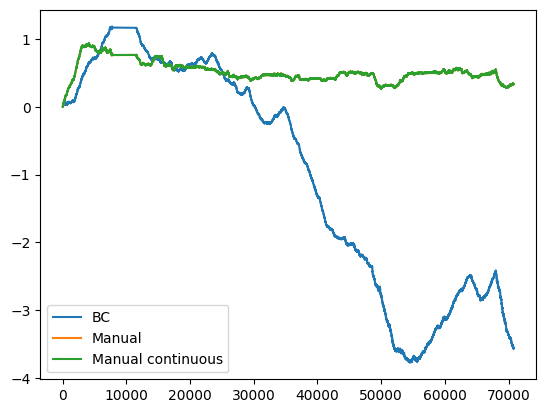

In [42]:
# plt.plot(df_dagger["value"], label="DAGGER")
plt.plot(df_bc["inventory"], label="BC")
plt.plot(df_manual["inventory"], label="Manual")
plt.plot(df_manual_cont["inventory"], label="Manual continuous")
plt.legend()
plt.show()

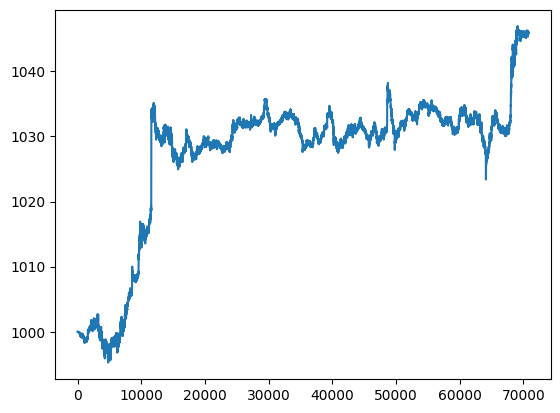

In [10]:
plt.plot(df["value"])



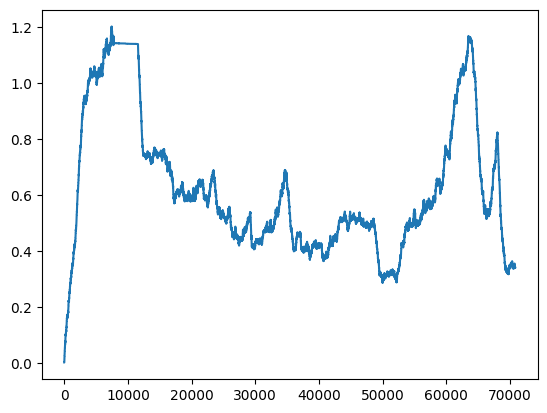

In [11]:
plt.plot(df["inventory"])


In [ ]:
# ts, x, y
arr = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
arr.tolist()

array([6, 9])

In [29]:
class OSIEstimator():
    def __init__(
        self,
        lookback=1000 * 60 * 60 * 24,
        update_interval=1000 * 60 * 60,
    ):
        lookback = lookback
        update_interval = update_interval
        buys = []
        sells = []
        previous_update = 0

    def update(self, trades):
        # trade is list of lists [[timestamp, price, amount, mid_price]]
        for trade in trades:
            ts, price, amount, mid_price = trade

            # sides are determined by price relative to mid_price, based on what side take is on
            if price < mid_price:
                sells.append(np.array([ts, amount]))
            elif price > mid_price:
                buys.append(np.array([ts, amount]))

    def calculate_values(self):
        """
        Function for calculating OSI. Currently updates OSI every hour.
        trade_bids/asks are two dimensional arrays formed like this [[timestamp, size]]
        This function sorts the trades by size and takes the 90% quantile sized trades for OSI calculation.
        """

        buy, sell = np.array(buys), np.array(sells)
        buy_qty, sell_qty = buy[:, 1], sell[:, 1]
        decile_buys = buy_qty[: (buy_qty < np.percentile(buy_qty, 90)).argmin()].sum()
        decile_sells = sell_qty[
            : (sell_qty < np.percentile(sell_qty, 90)).argmin()
        ].sum()

        osi = 100 * ((decile_buys - decile_sells) / (decile_buys + decile_sells))
        osi = osi

    def get_value(self, ts):
        if ts >= previous_update + update_interval:
            # prune trades that are too old
            buy_arr = np.array(buys)
            buys = buy_arr[buy_arr[:, 0] < (ts - lookback)].tolist()

            sell_arr = np.array(sells)
            sells = sell_arr[sell_arr[:, 0] < (ts - lookback)].tolist()

            calculate_values()
            previous_update = ts
        return osi
    
osi = OSIEstimator()
osi.update([[10, 10, 10, 0]])
osi.update([[20, 20, 20, 0]])

osi.update([[10, 10, 10, 40]])
osi.update([[20, 20, 20, 40]])
buy, sell = np.array(osi.buys), np.array(osi.sells)
buy_qty, sell_qty = buy[:, 1], sell[:, 1]


decile_buys = buy_qty[: (buy_qty < np.percentile(buy_qty, 90)).argmin()].sum()
decile_sells = sell_qty[
    : (sell_qty < np.percentile(sell_qty, 90)).argmin()
].sum()



0

In [31]:
import pandas as pd
import logging
import numpy as np
from scipy.optimize import curve_fit
import queue
import pandas as pd
import math


In [7]:
class VolatilityEstimator():
    """
    lookback: how far back (in milliseconds) to look at trades, default: 1 day
    return_aggregation: aggregation period for price returns (what is the time period between two price observations), default: 10 minutes
    update_interval: how often to update the estimator (in milliseconds), default: 1 minute
    """

    def __init__(
        self,
        lookback=(1000 * 60 * 60 * 24),
        return_aggregation=(1000 * 60 * 10),
        update_interval=(1000 * 60),
    ):
        lookback = lookback
        update_interval = update_interval
        return_aggregation = return_aggregation

        previous_ts = 0

        # prices = []
        prices = []

        volatility = 0
        previous_update = 0

    def update(self, new_price, ts):
        if ts >= previous_ts + return_aggregation:
            prices.append([ts, new_price])
            previous_ts = ts

    def calculate_volatility_real(self):
        """
        Vol = std(returns)
        Annualized vol = vol * sqrt(aggregation periods per year)
            - aggregation period is in milliseconds
        """
        a = np.array(price_queue.queue)
        return_arr = np.diff(a) / a[:, 1:]
        vol = np.std(return_arr)
        volatility = vol * np.sqrt(
            (1000 * 60 * 60 * 24 * 365) / return_aggregation
        )

    def calculate_values(self):
        """
        Calculates price volatility instead of percentage volatility
        """
        arr = np.array(prices)
        volatility = np.sqrt(np.sum(np.square(np.diff(arr))) / arr.size)

    def get_value(self, ts):
        if ts >= previous_update + update_interval:
            # prune old prices
            prices = np.array(prices)
            prices = prices[prices[:, 0] >= ts - lookback].tolist()
            calculate_values()
            previous_update = ts
        return volatility
    
vol = VolatilityEstimator(update_interval=0, return_aggregation=0)
vol.update(10, 100)
vol.update(11, 200)
np.array(vol.prices)[:,1]



array([10, 11])

In [45]:
base = pd.read_csv("/home/juuso/Documents/gradu/parsed_data/aggregated/base_data.csv")
indicators = pd.read_csv("/home/juuso/Documents/gradu/parsed_data/aggregated/indicator_data.csv")
data = pd.merge(base, indicators, on="timestamp", how='left').ffill().dropna()

In [79]:
len(data.to_numpy())

161113

In [93]:
envs = 3

current_step = np.array(range(3))
second_step = np.array([1])



current_step += 1
current_step

values = np.array(range(10)) * 10
print(values.shape, current_step.shape)
print(values[current_step])
print(values[second_step])

(10,) (3,)
[10 20 30]
[10]


In [108]:
a = np.array([1]).reshape(-1,1).T
b = np.array([2]).reshape(-1,1).T
c = np.array([3]).reshape(-1,1).T

print(np.concatenate([a,b,c]).T.shape)

a = np.array([1,2,3]).reshape(-1,1).T
b = np.array([4,5,6]).reshape(-1,1).T
c = np.array([7,8,9]).reshape(-1,1).T

np.concatenate([a,b,c]).T.shape

(1, 3)


(3, 3)

In [130]:
a = np.array([[1, 2], [3, 4]]).reshape(-1,1).T
a.reshape(4,)

array([1, 2, 3, 4])

In [161]:
data = 100
envs = 5
data_portion=0.3

if data_portion * envs < 1:
    start = np.array(range(envs)) * data_portion
    end = start + data_portion
    start_val = start * data
    end_val = end * data
    
else:
    offset = (1-data_portion) / (envs-1)
    start = np.array(range(envs)) * offset
    end = start + data_portion
    start_val = start * data
    end_val = end * data
    
    
start_val, end_val


(array([ 0. , 17.5, 35. , 52.5, 70. ]),
 array([ 30. ,  47.5,  65. ,  82.5, 100. ]))

In [5]:
# check if array has only one true value
a = np.array([True, False, False])
np

array([4, 5, 6])